<a href="https://colab.research.google.com/github/Nico-GP/Sales_Predictions/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODING DOJO**: Proyecto 1 
## Creado por: Nicolas Gonzalez
### Descripcion: Resumen de datos
* Creado: 09/02/22
* Ultima Actualizacion: 09/02/22

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/CodingDojo/Project1/sales_predictions.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Data Cleaning

Informacion de la trama de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Se identifica donde hay valores faltantes

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Se cuantifica porcentualmente los datos faltantes

In [ ]:
df.isna().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

Informacion estadistica de la trama de datos

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Se ingresa la categoria "Unspecified" en las celdas vacias de la comlumna "Outlet_Size"

In [ ]:
df["Outlet_Size"].fillna("Unspecified", inplace = True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unspecified,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Trama de datos con valores iguales a 0 de la columna "Item_Visibility"

In [ ]:
missing_IV = df["Item_Visibility"] == 0
df.loc[missing_IV, :].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Unspecified,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064


Se eliminan las filas que contengan "0" en la columna "Item_Visibility"

In [ ]:
df.drop(df.loc[df["Item_Visibility"]==0].index, inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
6,FDO10,13.65,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


Categorias de la columna "Item_Fat_Content"

In [ ]:
df["Item_Fat_Content"].value_counts()

Low Fat    4789
Regular    2708
LF          285
reg         113
low fat     102
Name: Item_Fat_Content, dtype: int64

Se estandariza las categorias de la columna "Item_Fat_Content"

In [ ]:
df["Item_Fat_Content"].replace({"LF": "Low Fat", "low fat": "Low Fat", "reg": "Regular"}, inplace=True)
df["Item_Fat_Content"].value_counts()

Low Fat    5176
Regular    2821
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
6,FDO10,13.65,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1373
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Se completan los valores faltantes de la categoria "Item_Weight" con valores rescatados de otras filas

In [ ]:
pesos = df[['Item_Identifier', 'Item_Weight']].dropna().drop_duplicates()

df = df[['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',	'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']].merge(pesos)
df = df[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',	'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']]

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,Unspecified,Tier 2,Supermarket Type1,5976.2208
2,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
3,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,Unspecified,Tier 3,Grocery Store,498.0184


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7991 entries, 0 to 7990
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7991 non-null   object 
 1   Item_Weight                7991 non-null   float64
 2   Item_Fat_Content           7991 non-null   object 
 3   Item_Visibility            7991 non-null   float64
 4   Item_Type                  7991 non-null   object 
 5   Item_MRP                   7991 non-null   float64
 6   Outlet_Identifier          7991 non-null   object 
 7   Outlet_Establishment_Year  7991 non-null   int64  
 8   Outlet_Size                7991 non-null   object 
 9   Outlet_Location_Type       7991 non-null   object 
 10  Outlet_Type                7991 non-null   object 
 11  Item_Outlet_Sales          7991 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 811.6+ KB


In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Visualization

In [ ]:
import matplotlib.pyplot as plt

Tipo de producto mas comun

In [ ]:
df["Item_Type"].mode()

0    Fruits and Vegetables
dtype: object

Ventas totales por tipo de producto

In [ ]:
v_tipo = df.groupby(["Item_Type"])[["Item_Outlet_Sales"]].sum()
v_tipo

,Item_Outlet_Sales
Item_Type,
Baking Goods,1.193480e+06
Breads,5.088317e+05
Breakfast,2.268148e+05
Canned,1.369648e+06
Dairy,1.434778e+06
Frozen Foods,1.714368e+06
Fruits and Vegetables,2.594304e+06
Hard Drinks,4.216318e+05
Health and Hygiene,9.753384e+05


In [ ]:
v_tipo.to_excel(excel_writer='v_tipo.xlsx',index=True)

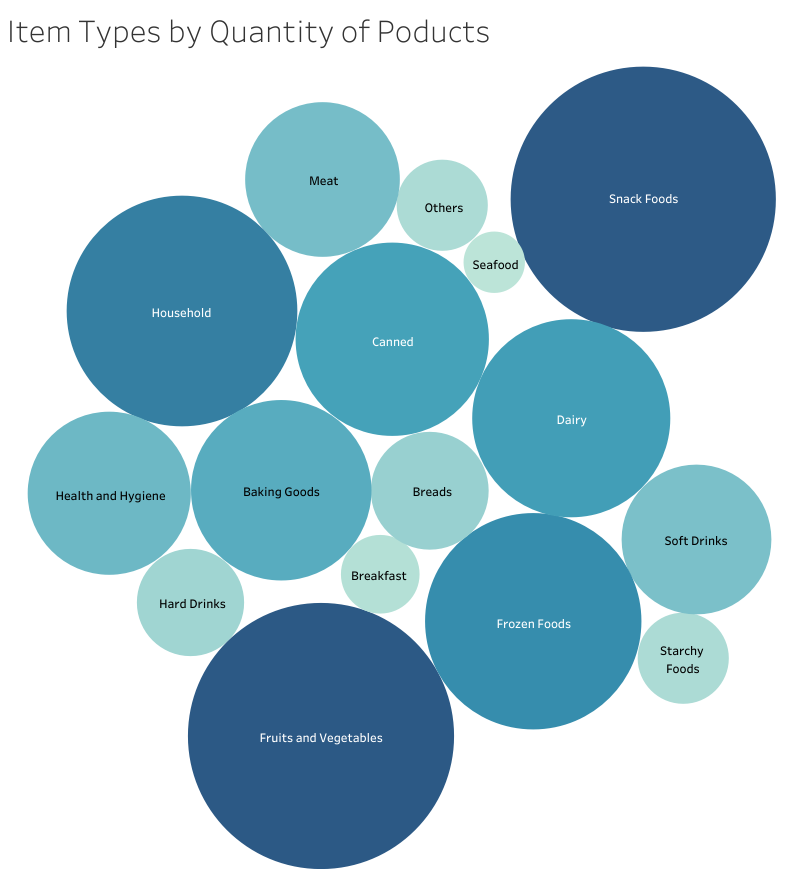

Ventas totales de cada producto

In [ ]:
df.groupby(["Item_Identifier"])[["Item_Outlet_Sales"]].sum()

,Item_Outlet_Sales
Item_Identifier,
DRA12,6239.8776
DRA24,15723.5328
DRA59,18509.2400
DRB01,4554.0720
DRB13,12144.1920
...,...
NCZ30,11689.4506
NCZ41,7259.8832
NCZ42,18487.9344


Ventas totales de cada tienda

In [ ]:
v_tienda = df.groupby(["Outlet_Identifier"])[["Item_Outlet_Sales"]].sum()
v_tienda

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,1.770575e+05
OUT013,2.002286e+06
OUT017,2.037795e+06
OUT018,1.720256e+06
OUT019,1.705214e+05
OUT027,3.211145e+06
OUT035,2.140235e+06
OUT045,1.888582e+06
OUT046,1.989434e+06


In [ ]:
v_tienda.to_excel(excel_writer='v_tienda.xlsx',index=True)

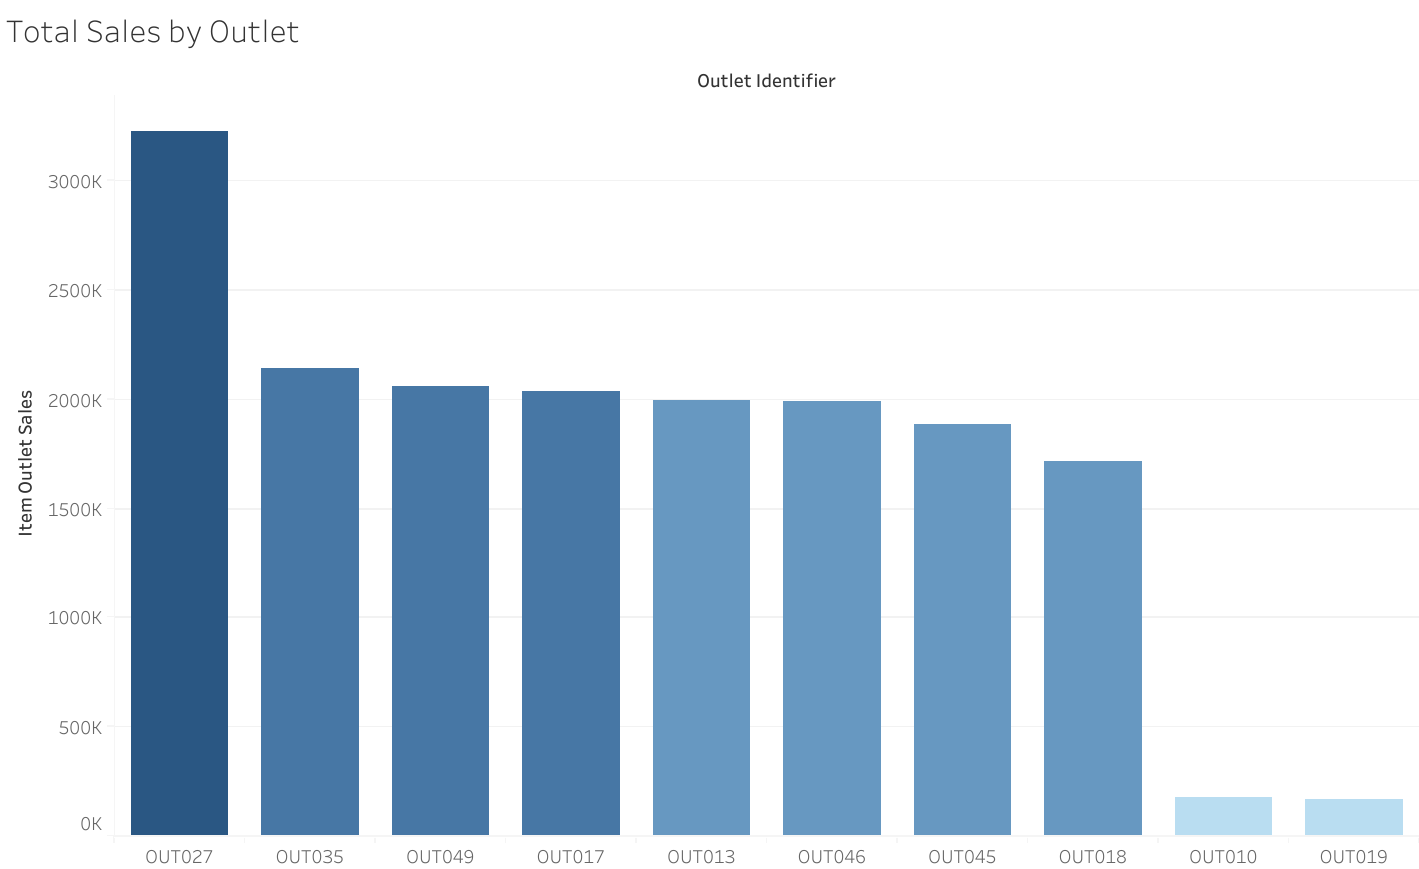

Ventas promedio de cada producto en cada tienda

In [ ]:
df.groupby(["Outlet_Identifier", "Item_Identifier"])[["Item_Outlet_Sales"]].mean()

Item_Outlet_Sales
Outlet_Identifier Item_Identifier                   
OUT010            DRA12                     283.6308
                  DRA24                     327.5736
                  DRA59                     185.0924
                  DRB13                     948.7650
                  DRB25                     214.3876
...                                              ...
OUT049            NCZ18                    5580.7356
                  NCZ30                    2530.7058
                  NCZ42                    4740.4960
                  NCZ53                    3956.8494
                  NCZ54                    7148.0288

[7991 rows x 1 columns]

Ventas promedio por tamaño de tienda

In [ ]:
v_tamano_p = df.groupby(["Outlet_Size"])[["Item_Outlet_Sales"]].mean()
v_tamano_p

,Item_Outlet_Sales
Outlet_Size,
High,2293.568889
Medium,2680.155452
Small,1918.015674
Unspecified,1810.871106


In [ ]:
v_tamano_p.to_excel(excel_writer='v_tamano_p.xlsx',index=True)

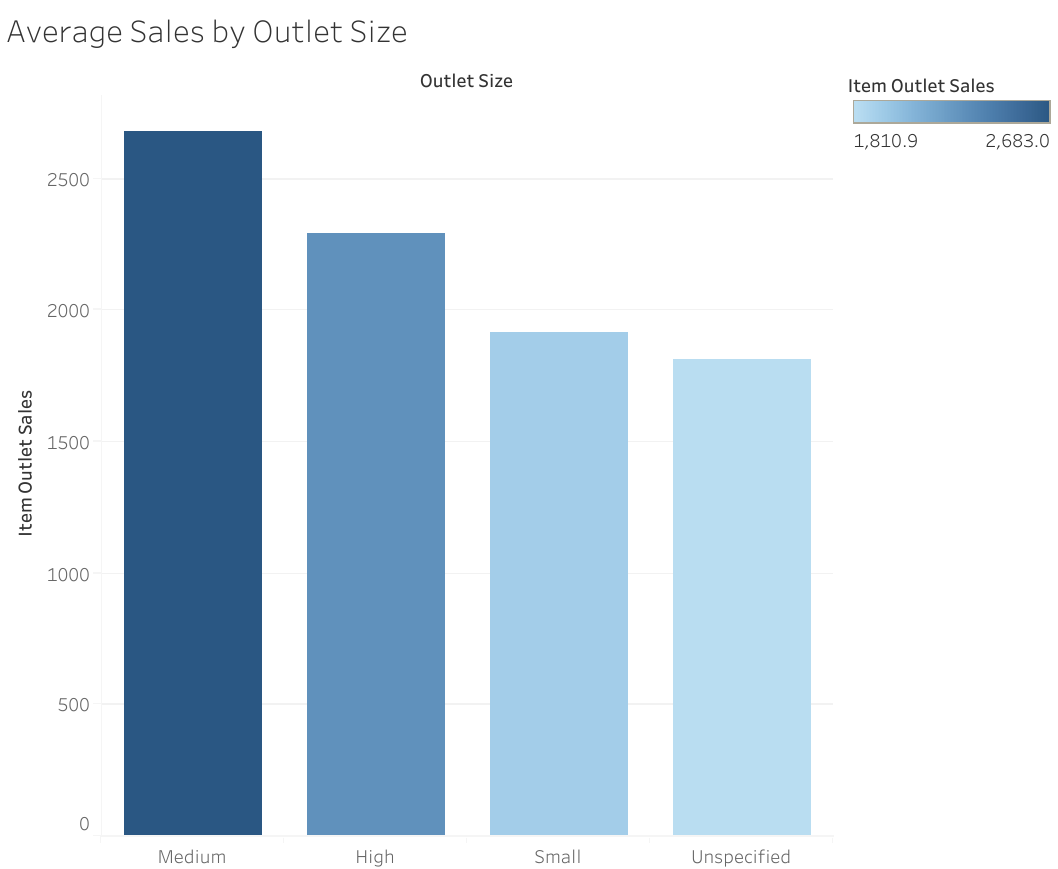

Producto mas vendido en cada tienda

In [ ]:
df.groupby(["Outlet_Identifier", "Item_Identifier"])[["Item_Outlet_Sales"]].max()

Item_Outlet_Sales
Outlet_Identifier Item_Identifier                   
OUT010            DRA12                     283.6308
                  DRA24                     327.5736
                  DRA59                     185.0924
                  DRB13                     948.7650
                  DRB25                     214.3876
...                                              ...
OUT049            NCZ18                    5580.7356
                  NCZ30                    2530.7058
                  NCZ42                    4740.4960
                  NCZ53                    3956.8494
                  NCZ54                    7148.0288

[7991 rows x 1 columns]

Ventas promedio de los productos agrupadas por visibilidad

In [ ]:
df.groupby(["Item_Identifier", "Item_Visibility"])[["Item_Outlet_Sales"]].mean()

Item_Outlet_Sales
Item_Identifier Item_Visibility                   
DRA12           0.040912                 2552.6772
                0.041113                  850.8924
                0.041178                 2552.6772
                0.068535                  283.6308
DRA24           0.039735                 4913.6040
...                                            ...
NCZ54           0.083359                 4711.2008
                0.083489                 7148.0288
                0.083528                 2274.3728
                0.083699                 2599.2832
                0.145952                  162.4552

[7991 rows x 1 columns]

Ventas agrupadas por año de establecimiento de las tiendas

In [ ]:
v_ano = df.groupby(["Outlet_Establishment_Year"])[["Item_Outlet_Sales"]].sum()
v_ano

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,3.381667e+06
1987,2.002286e+06
1997,1.989434e+06
1998,1.770575e+05
1999,2.063804e+06
2002,1.888582e+06
2004,2.140235e+06
2007,2.037795e+06
2009,1.720256e+06


In [ ]:
v_ano.to_excel(excel_writer='v_ano.xlsx',index=True)

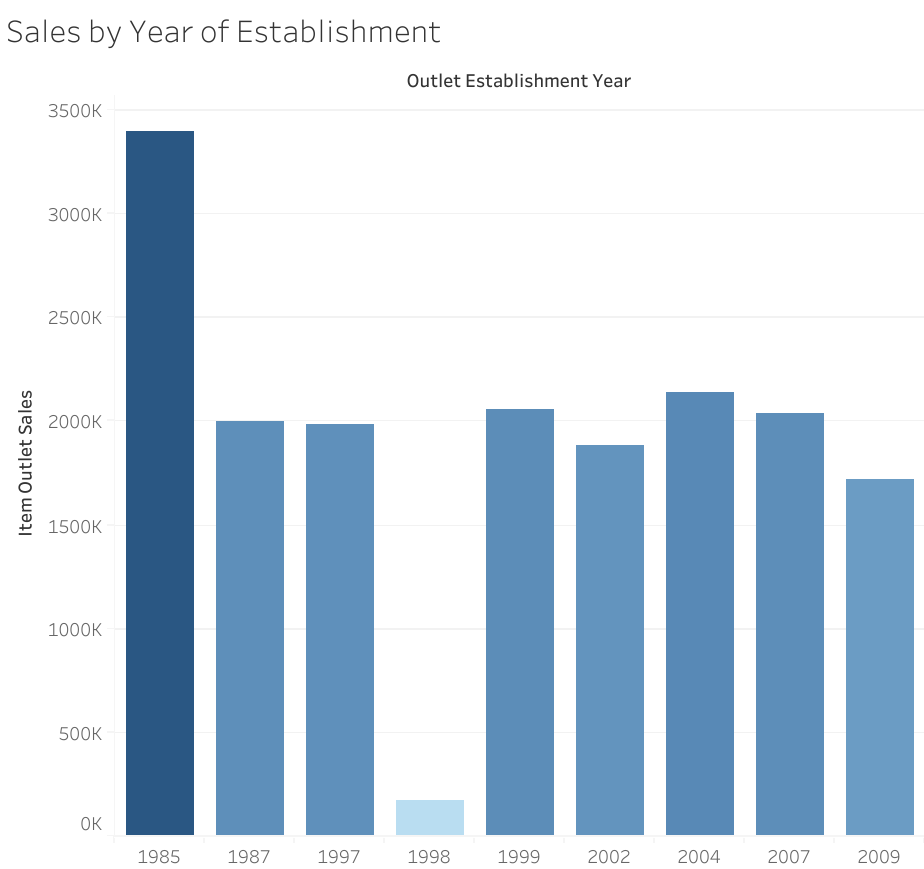

Ventas totales agrupadas por precio de cada producto

In [ ]:
df.groupby(["Item_Identifier", "Item_MRP"])[["Item_Outlet_Sales"]].sum()

Item_Outlet_Sales
Item_Identifier Item_MRP                   
DRA12           140.3154          2552.6772
                142.0154           850.8924
                142.3154          2552.6772
                143.0154           283.6308
DRA24           162.4868          4422.2436
...                                     ...
NCZ54           161.3552          7148.0288
                161.9552          4711.2008
                162.4552          2274.3728
                163.4552          2599.2832
                164.0552          5523.4768

[7544 rows x 1 columns]

Ventas totales por contenido de grasa

In [ ]:
v_grasa = df.groupby(["Item_Fat_Content"])[["Item_Outlet_Sales"]].sum()
v_grasa

,Item_Outlet_Sales
Item_Fat_Content,
Low Fat,1.114659e+07
Regular,6.254528e+06


In [ ]:
v_grasa.to_excel(excel_writer='v_grasa.xlsx',index=True)

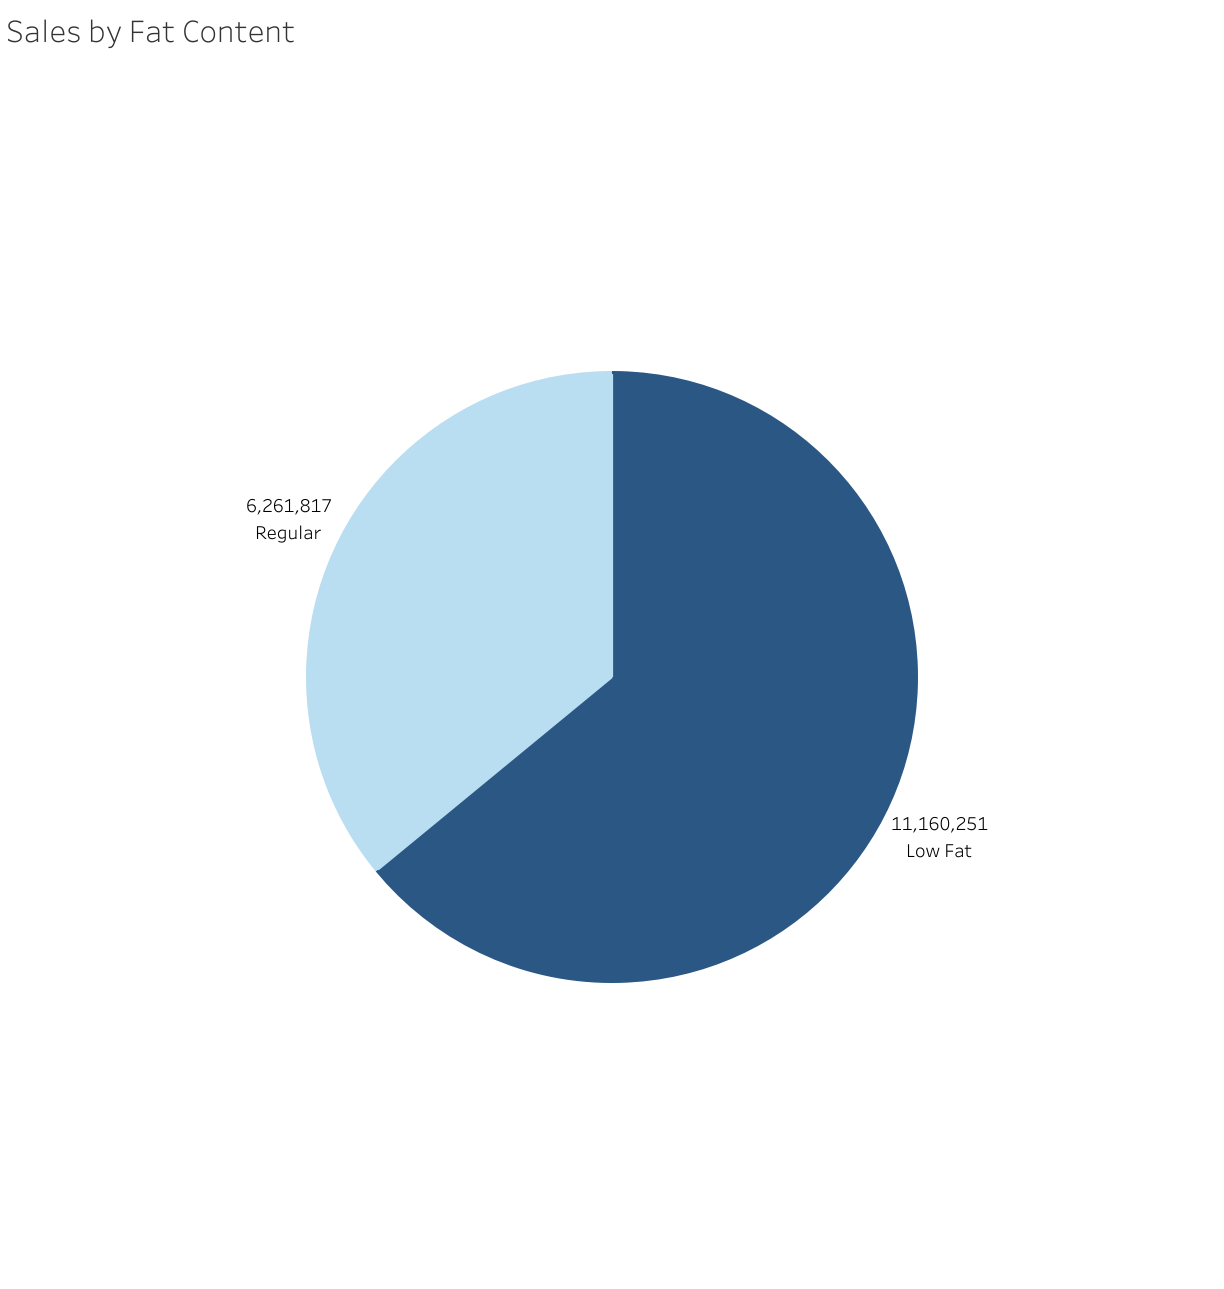

# Data Statistics

In [ ]:
import seaborn as sns

In [ ]:
sns.set_style('darkgrid')

Distribucion de tipos de tiendas

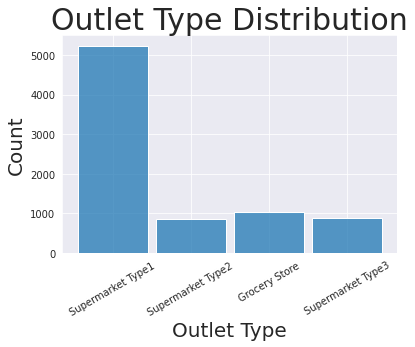

In [ ]:
OT = sns.histplot(x='Outlet_Type', data=df, shrink=0.9); 
OT.tick_params(axis='x', rotation=30);
OT.axes.set_title("Outlet Type Distribution",fontsize=30);
OT.set_xlabel("Outlet Type",fontsize=20);
OT.set_ylabel("Count",fontsize=20);

Distribucion de años de establecimiento de tiendas

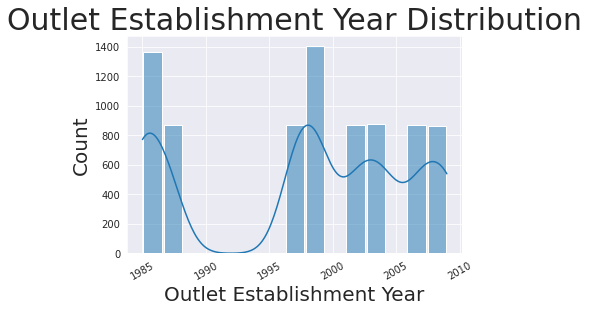

In [ ]:
OT = sns.histplot(x='Outlet_Establishment_Year', data=df, shrink=0.9, kde = True); 
OT.tick_params(axis='x', rotation=30);
OT.axes.set_title("Outlet Establishment Year Distribution",fontsize=30);
OT.set_xlabel("Outlet Establishment Year",fontsize=20);
OT.set_ylabel("Count",fontsize=20);

Distribucion de ventas por cada tienda

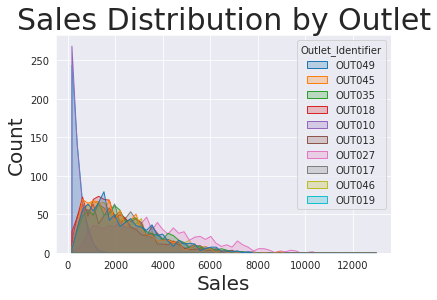

In [ ]:
IT = sns.histplot(x='Item_Outlet_Sales', data=df, 
             hue='Outlet_Identifier',
             element='poly'
            );
IT.axes.set_title("Sales Distribution by Outlet",fontsize=30);
IT.set_xlabel("Sales",fontsize=20);
IT.set_ylabel("Count",fontsize=20);

Distribucion de ventas del producto por visibilidad|

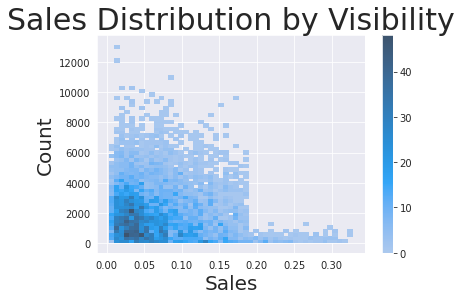

In [ ]:
IV = sns.histplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df,
             cbar=True
            );
IV.axes.set_title("Sales Distribution by Visibility",fontsize=30);
IV.set_xlabel("Sales",fontsize=20);
IV.set_ylabel("Count",fontsize=20);

Ventas distribuidas por locacion de tiendas y divididas por contenido graso

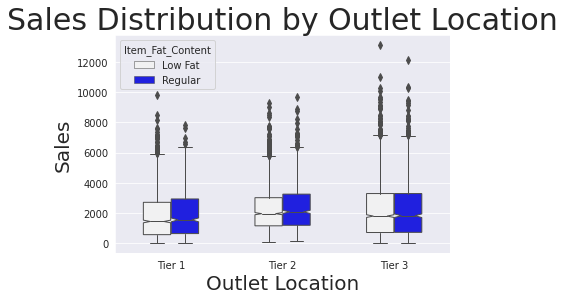

In [ ]:
OL = sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Item_Fat_Content', data=df, notch = True, color = 'b', width=0.5, linewidth=1);
OL.axes.set_title("Sales Distribution by Outlet Location",fontsize=30);
OL.set_xlabel("Outlet Location",fontsize=20);
OL.set_ylabel("Sales",fontsize=20);

# Data Prediction

Prediccion de ventas

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,Unspecified,Tier 2,Supermarket Type1,5976.2208
2,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
3,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,Unspecified,Tier 3,Grocery Store,498.0184


In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
import statsmodels.formula.api as smf

Se agrupan los valores categoricos

In [ ]:
categorical = df.loc[:, ['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]
categorical.head()

,Item_Fat_Content,Item_Type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,1999,Medium,Tier 1,Supermarket Type1
1,Low Fat,Dairy,2002,Unspecified,Tier 2,Supermarket Type1
2,Low Fat,Dairy,2004,Small,Tier 2,Supermarket Type1
3,Low Fat,Dairy,2009,Medium,Tier 3,Supermarket Type2
4,Low Fat,Dairy,1998,Unspecified,Tier 3,Grocery Store


In [ ]:
non_num = ['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
categorical.loc[:, non_num].head()

,Item_Fat_Content,Item_Type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,1999,Medium,Tier 1,Supermarket Type1
1,Low Fat,Dairy,2002,Unspecified,Tier 2,Supermarket Type1
2,Low Fat,Dairy,2004,Small,Tier 2,Supermarket Type1
3,Low Fat,Dairy,2009,Medium,Tier 3,Supermarket Type2
4,Low Fat,Dairy,1998,Unspecified,Tier 3,Grocery Store


In [ ]:
cat = categorical.loc[:, non_num].to_numpy()

In [ ]:
pip install category_encoders

In [ ]:
import category_encoders as ce

Se transforman los valores categoricos a valores dummy

In [ ]:
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
cat_to_num = ohe.fit_transform(cat)
cat_to_num.head()

,0_Low Fat,0_Regular,1_Dairy,1_Soft Drinks,1_Meat,1_Snack Foods,1_Frozen Foods,1_Fruits and Vegetables,1_Breakfast,1_Health and Hygiene,1_Hard Drinks,1_Baking Goods,1_Household,1_Canned,1_Breads,1_Starchy Foods,1_Others,1_Seafood,2_1999.0,2_2002.0,2_2004.0,2_2009.0,2_1998.0,2_1987.0,2_1985.0,2_2007.0,2_1997.0,3_Medium,3_Unspecified,3_Small,3_High,4_Tier 1,4_Tier 2,4_Tier 3,5_Supermarket Type1,5_Supermarket Type2,5_Grocery Store,5_Supermarket Type3
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


Se renombran las columnas

In [ ]:
cat_to_num = cat_to_num.set_axis(['Low_Fat', 'Regular', 'Dairy', 'Soft_Drinks', 'Meat', 'Snack_Foods', 'Frozen_Foods', 'Fruits_and_Vegetables', 'Breakfast', 'Health_and_Hygiene', 'Hard_Drinks', 'Baking_Goods', 'Household', 'Canned', 'Breads', 'Starchy_Foods', 'Others', 'Seafood', '1999', '2002', '2004', '2009', '1998', '1987', '1985', '2007', '1997', 'Medium', 'Unspecified', 'Small', 'High', 'Tier_1', 'Tier_2', 'Tier_3', 'Supermarket_Type1', 'Supermarket_Type2', 'Grocery_Store', 'Supermarket_Type3'], axis=1, inplace=False)
cat_to_num.head()

,Low_Fat,Regular,Dairy,Soft_Drinks,Meat,Snack_Foods,Frozen_Foods,Fruits_and_Vegetables,Breakfast,Health_and_Hygiene,Hard_Drinks,Baking_Goods,Household,Canned,Breads,Starchy_Foods,Others,Seafood,1999,2002,2004,2009,1998,1987,1985,2007,1997,Medium,Unspecified,Small,High,Tier_1,Tier_2,Tier_3,Supermarket_Type1,Supermarket_Type2,Grocery_Store,Supermarket_Type3
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [ ]:
cat_to_num.shape

(7991, 38)

Se agrupan los valores restantes

In [ ]:
remaining = df.loc[:, ['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier', 'Item_Outlet_Sales']]
remaining.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales
0,FDA15,9.3,0.016047,249.8092,OUT049,3735.1380
1,FDA15,9.3,0.016055,250.2092,OUT045,5976.2208
2,FDA15,9.3,0.016019,248.5092,OUT035,6474.2392
3,FDA15,9.3,0.016088,249.6092,OUT018,5976.2208
4,FDA15,9.3,0.026818,248.9092,OUT010,498.0184


In [ ]:
remaining.shape

(7991, 6)

Se unen ambos marcos de datos

In [ ]:
cat_to_num['tmp'] = 1
remaining['tmp'] = 1

In [ ]:
cat_to_num.to_numpy()
remaining.to_numpy()

array([['FDA15', 9.3, 0.016047301, ..., 'OUT049', 3735.138, 1],
       ['FDA15', 9.3, 0.016054884, ..., 'OUT045', 5976.2208, 1],
       ['FDA15', 9.3, 0.01601936, ..., 'OUT035', 6474.2392, 1],
       ...,
       ['NCW05', 20.25, 0.148372897, ..., 'OUT045', 3644.5892, 1],
       ['NCT53', 5.4, 0.084245356, ..., 'OUT019', 657.8104, 1],
       ['NCT53', 5.4, 0.048388423, ..., 'OUT017', 2302.3364, 1]],
      dtype=object)

In [ ]:
df_predictions = pd.concat([remaining, cat_to_num],axis=1)
print(df_predictions)

     Item_Identifier  Item_Weight  ...  Supermarket_Type3  tmp
0              FDA15         9.30  ...                  0    1
1              FDA15         9.30  ...                  0    1
2              FDA15         9.30  ...                  0    1
3              FDA15         9.30  ...                  0    1
4              FDA15         9.30  ...                  0    1
...              ...          ...  ...                ...  ...
7986           NCW30         5.21  ...                  0    1
7987           NCW05        20.25  ...                  0    1
7988           NCW05        20.25  ...                  0    1
7989           NCT53         5.40  ...                  0    1
7990           NCT53         5.40  ...                  0    1

[7991 rows x 46 columns]


Se crea la base de datos apta para predicciones

In [ ]:
df_predictions = pd.DataFrame(df_predictions)
df_predictions = df_predictions.drop(columns=['tmp'])
df_predictions.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Low_Fat,Regular,Dairy,Soft_Drinks,Meat,Snack_Foods,Frozen_Foods,Fruits_and_Vegetables,Breakfast,Health_and_Hygiene,Hard_Drinks,Baking_Goods,Household,Canned,Breads,Starchy_Foods,Others,Seafood,1999,2002,2004,2009,1998,1987,1985,2007,1997,Medium,Unspecified,Small,High,Tier_1,Tier_2,Tier_3,Supermarket_Type1,Supermarket_Type2,Grocery_Store,Supermarket_Type3
0,FDA15,9.3,0.016047,249.8092,OUT049,3735.1380,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,FDA15,9.3,0.016055,250.2092,OUT045,5976.2208,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,FDA15,9.3,0.016019,248.5092,OUT035,6474.2392,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,FDA15,9.3,0.016088,249.6092,OUT018,5976.2208,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,FDA15,9.3,0.026818,248.9092,OUT010,498.0184,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [ ]:
df_predictions.shape

(7991, 44)

Se agrupan columnas por categorias de caracteristicas de producto

In [ ]:
df_item = df_predictions.loc[:, ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Low_Fat', 'Regular', 'Dairy', 'Soft_Drinks', 'Meat', 'Snack_Foods', 'Frozen_Foods', 'Fruits_and_Vegetables', 'Breakfast', 'Health_and_Hygiene', 'Hard_Drinks', 'Baking_Goods', 'Household', 'Canned', 'Breads', 'Starchy_Foods', 'Others', 'Seafood']]
df_item.head()

,Item_Weight,Item_Visibility,Item_MRP,Low_Fat,Regular,Dairy,Soft_Drinks,Meat,Snack_Foods,Frozen_Foods,Fruits_and_Vegetables,Breakfast,Health_and_Hygiene,Hard_Drinks,Baking_Goods,Household,Canned,Breads,Starchy_Foods,Others,Seafood
0,9.3,0.016047,249.8092,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9.3,0.016055,250.2092,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9.3,0.016019,248.5092,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9.3,0.016088,249.6092,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9.3,0.026818,248.9092,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
item_car = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Low_Fat', 'Regular', 'Dairy', 'Soft_Drinks', 'Meat', 'Snack_Foods', 'Frozen_Foods', 'Fruits_and_Vegetables', 'Breakfast', 'Health_and_Hygiene', 'Hard_Drinks', 'Baking_Goods', 'Household', 'Canned', 'Breads', 'Starchy_Foods', 'Others', 'Seafood']
df_item.loc[:, item_car].head()

,Item_Weight,Item_Visibility,Item_MRP,Low_Fat,Regular,Dairy,Soft_Drinks,Meat,Snack_Foods,Frozen_Foods,Fruits_and_Vegetables,Breakfast,Health_and_Hygiene,Hard_Drinks,Baking_Goods,Household,Canned,Breads,Starchy_Foods,Others,Seafood
0,9.3,0.016047,249.8092,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9.3,0.016055,250.2092,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9.3,0.016019,248.5092,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9.3,0.016088,249.6092,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9.3,0.026818,248.9092,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Se crea matriz de caracteristicas de item

In [ ]:
X_item = df_item.loc[:, item_car].to_numpy()
X_item.shape

(7991, 21)

Se agrupan columnas por categorias de caracteristicas de tienda

In [ ]:
df_outlet = df_predictions.loc[:, ['1999', '2002', '2004', '2009', '1998', '1987', '1985', '2007', '1997', 'Medium', 'Unspecified', 'Small', 'High', 'Tier_1', 'Tier_2', 'Tier_3', 'Supermarket_Type1', 'Supermarket_Type2', 'Grocery_Store', 'Supermarket_Type3']]
df_outlet.head()

,1999,2002,2004,2009,1998,1987,1985,2007,1997,Medium,Unspecified,Small,High,Tier_1,Tier_2,Tier_3,Supermarket_Type1,Supermarket_Type2,Grocery_Store,Supermarket_Type3
0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [ ]:
outlet_car = ['1999', '2002', '2004', '2009', '1998', '1987', '1985', '2007', '1997', 'Medium', 'Unspecified', 'Small', 'High', 'Tier_1', 'Tier_2', 'Tier_3', 'Supermarket_Type1', 'Supermarket_Type2', 'Grocery_Store', 'Supermarket_Type3']
df_outlet.loc[:, outlet_car].head()

,1999,2002,2004,2009,1998,1987,1985,2007,1997,Medium,Unspecified,Small,High,Tier_1,Tier_2,Tier_3,Supermarket_Type1,Supermarket_Type2,Grocery_Store,Supermarket_Type3
0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


Se crea matriz de caracteristicas de tienda

In [ ]:
X_outlet = df_outlet.loc[:, outlet_car].to_numpy()
X_outlet.shape

(7991, 20)

Se crea vector objetivo (ventas)

In [ ]:
y = df_predictions.loc[:, 'Item_Outlet_Sales'].values
y.shape

(7991,)

Se estandarizan los datos

In [ ]:
scaler.fit(X_item)
X_item = scaler.transform(X_item)
scaler.fit(X_outlet)
X_outlet = scaler.transform(X_outlet)

prediccion de vantas basadas en caracteristicas de producto

Se llama a la regresion K

In [ ]:
knn_item = KNeighborsRegressor()

Se ajustan los datos

In [ ]:
knn_item.fit(X_item, y)

KNeighborsRegressor()

Se realiza prediccion

In [ ]:
prediction_item = knn_item.predict(X_item)
prediction_item

array([5727.2116 , 5727.2116 , 5727.2116 , ..., 1400.04424, 1589.53092,
       1654.11352])

prediccion de vantas basadas en caracteristicas de tienda

Se llama a la regresion K

In [ ]:
knn_outlet = KNeighborsRegressor()

Se ajustan los datos

In [ ]:
knn_outlet.fit(X_outlet, y)

KNeighborsRegressor()

Se realiza prediccion

In [ ]:
prediction_outlet = knn_outlet.predict(X_outlet)
prediction_outlet

array([2303.668  , 1407.90068, 3024.0636 , ..., 1407.90068,  393.62096,
       1425.21148])

Se compara metricas de ambos modelos

metricas de modelo de caracteristicas de producto

In [ ]:
score_item = knn_item.score(X_item, y)
print(score_item)

0.5144581240866128


In [ ]:
np.sqrt(mean_squared_error(y, prediction_item))

1186.330021173437

metricas de modelo de caracteristicas de tienda

In [ ]:
score_outlet = knn_outlet.score(X_outlet, y)
print(score_outlet)

0.21447555115338823


In [ ]:
np.sqrt(mean_squared_error(y, prediction_outlet))

1508.9401976390523

prediccion de ventas basadas en todas las caracteristicas

In [ ]:
df_all = df_predictions.loc[:, ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Low_Fat', 'Regular', 'Dairy', 'Soft_Drinks', 'Meat', 'Snack_Foods', 'Frozen_Foods', 'Fruits_and_Vegetables', 'Breakfast', 'Health_and_Hygiene', 'Hard_Drinks', 'Baking_Goods', 'Household', 'Canned', 'Breads', 'Starchy_Foods', 'Others', 'Seafood', '1999', '2002', '2004', '2009', '1998', '1987', '1985', '2007', '1997', 'Medium', 'Unspecified', 'Small', 'High', 'Tier_1', 'Tier_2', 'Tier_3', 'Supermarket_Type1', 'Supermarket_Type2', 'Grocery_Store', 'Supermarket_Type3']]
df_all.head()

,Item_Weight,Item_Visibility,Item_MRP,Low_Fat,Regular,Dairy,Soft_Drinks,Meat,Snack_Foods,Frozen_Foods,Fruits_and_Vegetables,Breakfast,Health_and_Hygiene,Hard_Drinks,Baking_Goods,Household,Canned,Breads,Starchy_Foods,Others,Seafood,1999,2002,2004,2009,1998,1987,1985,2007,1997,Medium,Unspecified,Small,High,Tier_1,Tier_2,Tier_3,Supermarket_Type1,Supermarket_Type2,Grocery_Store,Supermarket_Type3
0,9.3,0.016047,249.8092,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,9.3,0.016055,250.2092,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,9.3,0.016019,248.5092,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,9.3,0.016088,249.6092,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,9.3,0.026818,248.9092,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [ ]:
car = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Low_Fat', 'Regular', 'Dairy', 'Soft_Drinks', 'Meat', 'Snack_Foods', 'Frozen_Foods', 'Fruits_and_Vegetables', 'Breakfast', 'Health_and_Hygiene', 'Hard_Drinks', 'Baking_Goods', 'Household', 'Canned', 'Breads', 'Starchy_Foods', 'Others', 'Seafood', '1999', '2002', '2004', '2009', '1998', '1987', '1985', '2007', '1997', 'Medium', 'Unspecified', 'Small', 'High', 'Tier_1', 'Tier_2', 'Tier_3', 'Supermarket_Type1', 'Supermarket_Type2', 'Grocery_Store', 'Supermarket_Type3']
df_all.loc[:, car].head()

,Item_Weight,Item_Visibility,Item_MRP,Low_Fat,Regular,Dairy,Soft_Drinks,Meat,Snack_Foods,Frozen_Foods,Fruits_and_Vegetables,Breakfast,Health_and_Hygiene,Hard_Drinks,Baking_Goods,Household,Canned,Breads,Starchy_Foods,Others,Seafood,1999,2002,2004,2009,1998,1987,1985,2007,1997,Medium,Unspecified,Small,High,Tier_1,Tier_2,Tier_3,Supermarket_Type1,Supermarket_Type2,Grocery_Store,Supermarket_Type3
0,9.3,0.016047,249.8092,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,9.3,0.016055,250.2092,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,9.3,0.016019,248.5092,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,9.3,0.016088,249.6092,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,9.3,0.026818,248.9092,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [ ]:
X_all = df_all.loc[:, car].to_numpy()
X_all.shape

(7991, 41)

Se estandarizan los datos

In [ ]:
scaler.fit(X_all)
X_all = scaler.transform(X_all)

Se llama a la regresion K

In [ ]:
knn_all = KNeighborsRegressor()

Se ajustan los datos

In [ ]:
knn_all.fit(X_all, y)

KNeighborsRegressor()

Se realiza prediccion

In [ ]:
prediction_all = knn_all.predict(X_all)
prediction_all

array([2995.96684, 2656.00936, 5229.06004, ..., 2093.2752 ,  407.60276,
       2253.733  ])

metricas de modelo de todas las caracteristicas

In [ ]:
score_all = knn_all.score(X_all, y)
print(score_all)

0.6502015064333819


In [ ]:
np.sqrt(mean_squared_error(y, prediction_all))

1006.9343171521241

Observaciones

El modelo con todas las caracteristicas tiene un porcentaje de acierto del 65% y un error abosuluto de 1006 unidades

Comparando los modelos de caracterisicas de producto y de tienda, se observa que el de producto tiene un mayor porcetaje de acierto. 51% y 21% respectivamente

El modelo de caracteristicas de item de producto tiene un error absoluto de 1186 unidades y el de caracteristicas de tienda tiene un error absoluto de 1508 unidades 

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,Unspecified,Tier 2,Supermarket Type1,5976.2208
2,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
3,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,Unspecified,Tier 3,Grocery Store,498.0184


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
lm1 = smf.ols(formula="Item_Outlet_Sales~Item_Weight+Item_Visibility+Item_MRP", data = df_predictions).fit()

In [ ]:
lm2 = smf.ols(formula="Item_Outlet_Sales~Low_Fat+Regular", data = df_predictions).fit()

In [ ]:
lm3 = smf.ols(formula="Item_Outlet_Sales~Dairy+Soft_Drinks+Meat+Snack_Foods+Frozen_Foods+Fruits_and_Vegetables+Breakfast+Health_and_Hygiene+Hard_Drinks+Baking_Goods+Household+Canned+Breads+Starchy_Foods+Others+Seafood", data = df_predictions).fit()

In [ ]:
lm4 = smf.ols(formula="Item_Outlet_Sales~Medium+Unspecified+Small+High", data = df_predictions).fit()

In [ ]:
lm5 = smf.ols(formula="Item_Outlet_Sales~Tier_1+Tier_2+Tier_3", data = df_predictions).fit()

In [ ]:
lm6 = smf.ols(formula="Item_Outlet_Sales~Supermarket_Type2+Grocery_Store+Supermarket_Type3", data = df_predictions).fit()

In [ ]:
lm7 = smf.ols(formula="Item_Outlet_Sales~Item_Weight+Item_Visibility+Item_MRP+Low_Fat+Regular+Dairy+Soft_Drinks+Meat+Snack_Foods+Frozen_Foods+Fruits_and_Vegetables+Breakfast+Health_and_Hygiene+Hard_Drinks+Baking_Goods+Household+Canned+Breads+Starchy_Foods+Others+Seafood+Medium+Unspecified+Small+High+Tier_1+Tier_2+Tier_3+Supermarket_Type2+Grocery_Store+Supermarket_Type3", data = df_predictions).fit()

Relacion de ventas con caracteristicas del producto

In [ ]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     1372.
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:47:16   Log-Likelihood:                -69130.
No. Observations:                7991   AIC:                         1.383e+05
Df Residuals:                    7987   BIC:                         1.383e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         334.1456     61.285     

Relacion de ventas con el contenido graso

In [ ]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                      -0.005
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    -19.26
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               1.00
Time:                        19:47:16   Log-Likelihood:                -70810.
No. Observations:                7991   AIC:                         1.416e+05
Df Residuals:                    7988   BIC:                         1.416e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.123e+16   4.78e+15     -2.351      0.0

Relacion de ventas con el tipo de producto

In [ ]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.248
Date:                Sun, 13 Feb 2022   Prob (F-statistic):            0.00379
Time:                        19:47:16   Log-Likelihood:                -70774.
No. Observations:                7991   AIC:                         1.416e+05
Df Residuals:                    7975   BIC:                         1.417e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2028.28

Relacion de ventas con el tamaño de la tienda

In [ ]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     99.21
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           1.50e-82
Time:                        19:47:16   Log-Likelihood:                -70597.
No. Observations:                7991   AIC:                         1.412e+05
Df Residuals:                    7986   BIC:                         1.412e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.839e+16   6.08e+15     -3.025      

Relacion de ventas con la locacion de la tienda

In [ ]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     14.11
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           3.59e-09
Time:                        19:47:16   Log-Likelihood:                -70770.
No. Observations:                7991   AIC:                         1.415e+05
Df Residuals:                    7987   BIC:                         1.416e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.441e+16   6.31e+15     -2.283      0.0

Relacion de ventas con el tipo de tienda

In [ ]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     844.3
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:47:16   Log-Likelihood:                -69690.
No. Observations:                7991   AIC:                         1.394e+05
Df Residuals:                    7987   BIC:                         1.394e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2315.5943     20.50

In [ ]:
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     382.3
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:47:16   Log-Likelihood:                -67469.
No. Observations:                7991   AIC:                         1.350e+05
Df Residuals:                    7963   BIC:                         1.352e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                77.30

Observaciones

Asumiendo un nivel de significacion del 95%, las variables significativas en el modelo que contempla todas las caracteristicas son:
* Item_MRP
* Fat_Content = Regular
* Outlet_Size = Medium, Unspecified
* Outlet_Location_Type = Tier_2
* Outlet_Type = Supermarket_Type2, Grocery_Store, Supermarket_Type3

La variable con mayor impacto en las ventas es Outlet_TypeSupermarket_Type3 con un coeficiente de determinacion de 1219.9221

Para mejorar el modelo se puede elegir solo las variables significativas y hacer combinaciones de las mismas

Se puede utilizar distintos algoritmos de prediccion y comparar sus resultados

Puede ser util utilizar herramientas como validacion cruzada y metodos de conjunto para afinar el modelo

Prediccion utilizando random forest y validacion de modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df_predictions.head(1)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Low_Fat,Regular,Dairy,Soft_Drinks,Meat,Snack_Foods,Frozen_Foods,Fruits_and_Vegetables,Breakfast,Health_and_Hygiene,Hard_Drinks,Baking_Goods,Household,Canned,Breads,Starchy_Foods,Others,Seafood,1999,2002,2004,2009,1998,1987,1985,2007,1997,Medium,Unspecified,Small,High,Tier_1,Tier_2,Tier_3,Supermarket_Type1,Supermarket_Type2,Grocery_Store,Supermarket_Type3
0,FDA15,9.3,0.016047,249.8092,OUT049,3735.138,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0


Se crea matriz de caracteristicas

In [ ]:
X_rf = df_all.loc[:, car]
X_rf.shape

(7991, 41)

Se crea vector objetivo

In [ ]:
y_rf = df_predictions.loc[:, 'Item_Outlet_Sales'].values
y_rf.shape

(7991,)

Se crean variables de entrenamientos y testeo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, random_state = 3)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

Coeficiente de determinacion de entrenamiento

In [ ]:
rf.score(X_train, y_train)

0.9362814465737369

Coeficiente de determinacion de testeo

In [ ]:
rf.score(X_test, y_test)

0.57437127265413

determinacion de numero optimo de estimadores 

In [ ]:
estimator_range = [1] + list(range(10, 310, 10))
print(estimator_range)

[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]


In [ ]:
scores = []

for estimator in estimator_range:
    rf = RandomForestRegressor(n_estimators=estimator,
                                 random_state=1,
                                 bootstrap=True)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))

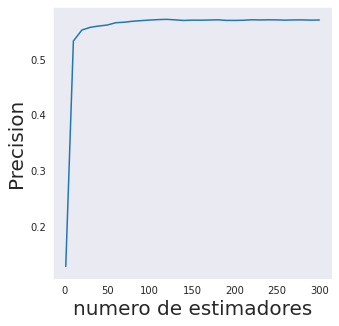

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5));
axes.plot(estimator_range, scores);
axes.set_xlabel('numero de estimadores', fontsize =20);
axes.set_ylabel('Precision', fontsize = 20);
axes.grid()

Aproximadamente 100 estimadores en adelante tienen la misma presicion

Random forest con parametros modificados

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, max_depth = 9, max_leaf_nodes = 60, min_samples_leaf = 30, random_state = 3)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_leaf_nodes=60, min_samples_leaf=30,
                      random_state=3)

Coeficiente de determinacion de entrenamiento

In [ ]:
rf.score(X_train, y_train)

0.6335256451978732

Coeficiente de determinacion de testeo

In [ ]:
rf.score(X_test, y_test)

0.6051961341801401

Comparacion predicciones y valores reales

In [ ]:
colnames = df_all.columns.values.tolist()
predictors = colnames


In [ ]:
preds = rf.predict(df_predictions[predictors])

In [ ]:
df_predictions['preds'] = preds

In [ ]:
df_predictions[['preds', 'Item_Outlet_Sales']]

,preds,Item_Outlet_Sales
0,4342.879641,3735.1380
1,4369.919376,5976.2208
2,4406.982184,6474.2392
3,3597.621387,5976.2208
4,526.149616,498.0184
...,...,...
7986,4242.004138,2848.9582
7987,1677.339084,2787.0388
7988,1683.660128,3644.5892
7989,399.198191,657.8104


Caracteristicas jerarquizadas por importancia para el modelo

In [ ]:
caracteristicas_rf = pd.DataFrame({'Caracteristica': X_train.columns, 'Importancia': rf.feature_importances_})
caracteristicas_rf.sort_values(by = 'Importancia', inplace = True)

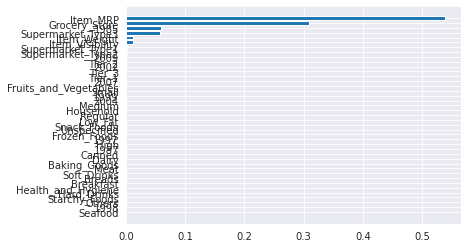

In [ ]:
fig = plt.barh(caracteristicas_rf['Caracteristica'], caracteristicas_rf['Importancia']);

Se crea marco de datos con las caracteristicas mas importantes

In [ ]:
df_imp = df_predictions.loc[:, ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Medium', 'Unspecified', 'Small', 'High', 'Tier_1', 'Tier_2', 'Tier_3', 'Supermarket_Type1', 'Supermarket_Type2', 'Grocery_Store', 'Supermarket_Type3']]
df_imp.head()

,Item_Weight,Item_Visibility,Item_MRP,Medium,Unspecified,Small,High,Tier_1,Tier_2,Tier_3,Supermarket_Type1,Supermarket_Type2,Grocery_Store,Supermarket_Type3
0,9.3,0.016047,249.8092,1,0,0,0,1,0,0,1,0,0,0
1,9.3,0.016055,250.2092,0,1,0,0,0,1,0,1,0,0,0
2,9.3,0.016019,248.5092,0,0,1,0,0,1,0,1,0,0,0
3,9.3,0.016088,249.6092,1,0,0,0,0,0,1,0,1,0,0
4,9.3,0.026818,248.9092,0,1,0,0,0,0,1,0,0,1,0


In [ ]:
imp = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Medium', 'Unspecified', 'Small', 'High', 'Tier_1', 'Tier_2', 'Tier_3', 'Supermarket_Type1', 'Supermarket_Type2', 'Grocery_Store', 'Supermarket_Type3']
df_imp.loc[:, imp].head()

,Item_Weight,Item_Visibility,Item_MRP,Medium,Unspecified,Small,High,Tier_1,Tier_2,Tier_3,Supermarket_Type1,Supermarket_Type2,Grocery_Store,Supermarket_Type3
0,9.3,0.016047,249.8092,1,0,0,0,1,0,0,1,0,0,0
1,9.3,0.016055,250.2092,0,1,0,0,0,1,0,1,0,0,0
2,9.3,0.016019,248.5092,0,0,1,0,0,1,0,1,0,0,0
3,9.3,0.016088,249.6092,1,0,0,0,0,0,1,0,1,0,0
4,9.3,0.026818,248.9092,0,1,0,0,0,0,1,0,0,1,0


Se crea matriz de caracteristicas

In [ ]:
X_imp = df_imp.loc[:, imp]
X_imp.shape

(7991, 14)

Se crea vector objetivo

In [ ]:
y_imp = df_predictions.loc[:, 'Item_Outlet_Sales'].values
y_imp.shape

(7991,)

Se crean variables de entrenamientos y testeo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_imp, y_imp, random_state = 3)

Se aplica random forest con los parametros anteriores

In [ ]:
rf_imp = RandomForestRegressor(n_estimators = 100, max_depth = 9, max_leaf_nodes = 60, min_samples_leaf = 30, random_state = 3)
rf_imp.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_leaf_nodes=60, min_samples_leaf=30,
                      random_state=3)

Coeficiente de determinacion de entrenamiento

In [ ]:
rf_imp.score(X_train, y_train)

0.6331249702176442

Coeficiente de determinacion de testeo

In [ ]:
rf_imp.score(X_test, y_test)

0.6037834636773671